In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, MultiTaskLasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor # when attributes are big
from sklearn.kernel_ridge import KernelRidge # identical to support vector regression (SVR)
from sklearn.svm import SVR # use support vector regression (SVR)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc

from sklearn.dummy import DummyRegressor

# Load prepared data

In [2]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean for 5 run 

In [3]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [5]:
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## 55 fmap means

In [ ]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        col.append(a)

In [ ]:
file_mean_55 = save_path+"fmap_mean_55.txt"
columns_mean_55 = ['exp', 'mini_exp', 'i', 'j', 'k'].append(col)
columns_mean_55.append(['theory'])
data = np.loadtxt(file_mean_55);

In [ ]:
columns_mean_55

## new attributes for Linear Models

In [7]:
file_mean_new = save_path+"fmap_mean_new.txt"
columns =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory', 'new0', 'new1', 'new2', 'new3', 'new4', 'slope', 'intercept']
data = np.loadtxt(file_mean_new);

In [8]:
df_new = pd.DataFrame(data, columns=columns)
df_new = df_new.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [9]:
df_new.isnull().any()

exp          False
mini_exp     False
i            False
j            False
k            False
mean0        False
mean1        False
mean2        False
mean3        False
mean4        False
theory       False
new0         False
new1         False
new2         False
new3         False
new4         False
slope        False
intercept    False
dtype: bool

In [10]:
df_new.describe()

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,new0,new1,new2,new3,new4,slope,intercept
count,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06
mean,3.700000e+01,3.500000e+00,2.150000e+01,3.150000e+01,3.150000e+01,-4.675177e+01,-4.632270e+01,-4.943398e+01,-5.254767e+01,-5.105728e+01,2.070648e+00,inf,-inf,-inf,-inf,inf,-1.076377e+00,-4.692826e+01
std,8.164967e-01,1.707825e+00,1.269843e+01,1.847296e+01,1.847296e+01,3.848085e+02,3.926424e+02,3.857237e+02,3.872141e+02,3.879891e+02,8.492458e+00,NaN,NaN,NaN,NaN,NaN,1.874691e+01,3.820577e+02
min,3.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.422362e+04,-1.461919e+04,-1.252448e+04,-1.425134e+04,-1.239863e+04,-7.759955e+02,-6.289785e+08,-inf,-inf,-inf,-6.289785e+08,-1.758125e+03,-1.271916e+04
25%,3.600000e+01,2.000000e+00,1.075000e+01,1.575000e+01,1.575000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.700000e+01,3.500000e+00,2.150000e+01,3.150000e+01,3.150000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.800000e+01,5.000000e+00,3.225000e+01,4.725000e+01,4.725000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.800000e+01,6.000000e+00,4.300000e+01,6.300000e+01,6.300000e+01,6.884447e+03,7.646300e+03,7.653812e+03,6.849814e+03,7.587812e+03,7.697382e+02,inf,9.660116e+07,1.257957e+09,1.257957e+09,inf,1.810604e+03,7.199591e+03


In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 18 columns):
 #   Column     Dtype  
---  ------     -----  
 0   exp        int64  
 1   mini_exp   int64  
 2   i          int64  
 3   j          int64  
 4   k          int64  
 5   mean0      float64
 6   mean1      float64
 7   mean2      float64
 8   mean3      float64
 9   mean4      float64
 10  theory     float64
 11  new0       float64
 12  new1       float64
 13  new2       float64
 14  new3       float64
 15  new4       float64
 16  slope      float64
 17  intercept  float64
dtypes: float64(13), int64(5)
memory usage: 445.5 MB


# Split data

## Only mean

In [13]:
df.iloc[:, 2:-1]

,i,j,k,mean0,mean1,mean2,mean3,mean4
0,0,0,1,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0.0,0.0,0.0,0.0,0.0
2,0,2,1,0.0,0.0,0.0,0.0,0.0
3,0,3,1,0.0,0.0,0.0,0.0,0.0
4,0,4,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3244027,63,59,6,0.0,0.0,0.0,0.0,0.0
3244028,63,60,6,0.0,0.0,0.0,0.0,0.0
3244029,63,61,6,0.0,0.0,0.0,0.0,0.0
3244030,63,62,6,0.0,0.0,0.0,0.0,0.0


In [14]:
X = df.iloc[:, 2:-1].values  # include i,j,k
y = df['theory'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [15]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3244032, 8)
(3244032,)
(2270822, 8)
(2270822,)
(973210, 8)
(973210,)


## Non zero
Not so effective

In [ ]:
df_copy = df.copy()
idx = df[(df['mean0']==0.0) & (df['mean1']==0.0) & (df['mean2']==0.0) & (df['mean3']==0.0) & (df['mean4']==0.0)].index
df_copy.drop(idx, inplace=True)
df_copy.reset_index(drop=True, inplace=True)
df_copy.shape

In [66]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [67]:
df_nonzero

,exp,i,j,k,mini_exp,mean0,mean1,mean2,mean3,mean4,theory
30760,36,7,32,40,1,118.874306,102.631088,73.720810,46.604973,35.842915,4.988159
30761,36,7,32,41,1,-69.809402,-88.836975,-115.809509,-147.981812,-157.407669,4.591202
30762,36,7,32,42,1,-501.965088,-518.938477,-546.379456,-559.395264,-578.390381,4.237324
30763,36,7,32,43,1,-729.152405,-748.379883,-771.094543,-794.678772,-810.996643,3.918999
30799,36,7,33,15,1,-1217.971191,-1236.205566,-1261.405762,-1284.039307,-1296.501587,3.371496
...,...,...,...,...,...,...,...,...,...,...,...
3213651,38,36,37,19,6,-75.107628,-68.905487,-75.427681,-82.513771,-79.595093,4.270157
3213652,38,36,37,20,6,76.162445,81.230690,75.100578,66.783051,69.944969,4.636876
3213653,38,36,37,21,6,196.146164,202.442993,194.505157,186.740524,189.227448,5.051056
3213660,38,36,37,28,6,749.112549,763.357300,750.066223,730.827637,739.551208,13.024664


In [68]:
X = df_nonzero.iloc[:, 5:-1].values
y = df_nonzero['theory'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## Splid data with mini experiment

In [7]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

In [8]:
df_train.iloc[:, 2:-1]

,i,j,k,mean0,mean1,mean2,mean3,mean4
0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0.0,0.0,0.0,0.0,0.0
2,0,0,2,0.0,0.0,0.0,0.0,0.0
3,0,0,3,0.0,0.0,0.0,0.0,0.0
4,0,0,4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
901115,43,63,59,0.0,0.0,0.0,0.0,0.0
901116,43,63,60,0.0,0.0,0.0,0.0,0.0
901117,43,63,61,0.0,0.0,0.0,0.0,0.0
901118,43,63,62,0.0,0.0,0.0,0.0,0.0


In [9]:
X_train = df_train.iloc[:, 5:-1].values
y_train = df_train['theory'].values

X_test = df_test.iloc[:, 5:-1].values
y_test = df_test['theory'].values

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


## Splid new data with mini experiment (new attributes)

In [16]:
df_train_new = df_new[(df_new['exp']==38) & (df_new['mini_exp']!=6)]
df_test_new = df_new[(df_new['exp']==38) & (df_new['mini_exp']==6)]

In [156]:
df_new.iloc[:, -7:-2]

,new0,new1,new2,new3,new4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3244027,0.0,0.0,0.0,0.0,0.0
3244028,0.0,0.0,0.0,0.0,0.0
3244029,0.0,0.0,0.0,0.0,0.0
3244030,0.0,0.0,0.0,0.0,0.0


In [159]:
X_train_new = df_train_new.iloc[:, -7:-2].values
y_train_new = df_train_new['theory'].values

X_test_new = df_test_new.iloc[:, -7:-2].values
y_test_new = df_test_new['theory'].values

In [160]:
print(X_train_new.shape)
print(y_train_new.shape)
print(X_test_new.shape)
print(y_test_new.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


# Benchmark

In [10]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_predict = dummy.predict(X_test)
print(dummy.score(X_train, y_train))
print(dummy.score(X_test, y_test))
print(r2_score(y_test, y_predict))

0.0
-1.1354114093364842e-08
-1.1354114093364842e-08


In [11]:
y_predict.shape

(180224,)

In [12]:
X_test[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

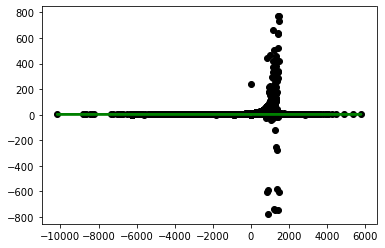

In [13]:
plt.scatter(X_test[:, 1], y_test,  color='black')
plt.plot(X_test[:, 1], y_predict, color='green', linewidth=2)

## None zero

In [69]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X2_train, y2_train)
y_predict = dummy.predict(X2_test)
print(dummy.score(X2_train, y2_train))
print(dummy.score(X2_test, y2_test))
print(r2_score(y2_test, y_predict))

0.0
-2.569623149817346e-07
-2.569623149817346e-07


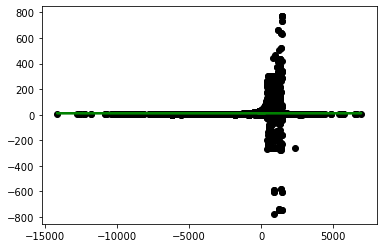

In [70]:
plt.scatter(X2_test[:, 1], y2_test,  color='black')
plt.plot(X2_test[:, 1], y_predict, color='green', linewidth=2)

# Linear Models

## Linear Regression

In [111]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [112]:
print('Intercept: %.3f' % lr.intercept_)

Intercept: 2.169


In [113]:
lr.coef_

array([ 0.00348759,  0.00659004,  0.00170523, -0.00598573,  0.00075654])

In [114]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 94.163, test: 94.070
R^2 train: 0.057, test: 0.060


In [115]:
print('Train Accuracy: %.3f' % lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Train Accuracy: 0.057
Test Accuracy: 0.060


In [116]:
lr.predict( [[786.106262, 848.382385, 782.896973, 716.524658, 781.549927]])

array([8.13934598])

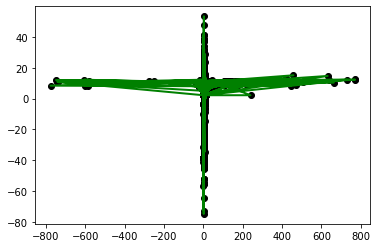

In [117]:
plt.scatter(y_test, y_test_pred,  color='black')
plt.plot(y_test, y_test_pred, color='green', linewidth=2)

In [89]:
df_output = df_test.copy()
df_output['predict'] = y_test_pred

In [91]:
np.savetxt(save_path+"lr_predict.txt", df_output[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

## new attributes

In [161]:
lr = LinearRegression()
lr.fit(X_train_new, y_train_new)
y_train_pred = lr.predict(X_train_new)
y_test_pred = lr.predict(X_test_new)

In [162]:
print('Intercept: %.3f' % lr.intercept_)

Intercept: 0.000


In [163]:
lr.coef_

array([ 2.59300462e+08, -1.72831118e-04,  1.03720186e+08,  1.74369663e-04,
       -5.18600902e+07])

In [164]:
print('Train Accuracy: %.3f' % lr.score(X_train_new, y_train_new))
print('Test Accuracy: %.3f' % lr.score(X_test_new, y_test_new))

Train Accuracy: 0.186
Test Accuracy: 0.186


In [165]:
lr.predict( [[786.106262, 848.382385, 782.896973, 716.524658, 781.549927]])

array([2.44508687e+11])

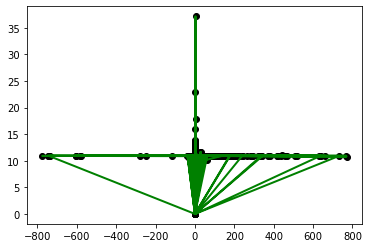

In [166]:
plt.scatter(y_test_new, y_test_pred,  color='black')
plt.plot(y_test_new, y_test_pred, color='green', linewidth=2)

In [169]:
df_test_new['predict'] = y_test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_20186/1982844353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_new['predict'] = y_test_pred


In [170]:
df_test_new

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,new0,new1,new2,new3,new4,slope,intercept,predict
3063808,38,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3063809,38,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3063810,38,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3063811,38,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3063812,38,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000196


In [174]:
np.savetxt(save_path+"lr_predict_new.txt", df_test_new[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

## Ridge

In [118]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [119]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [120]:
print('Slope: %.3f' % clf.coef_[0])
print('Intercept: %.3f' % clf.intercept_)

Slope: 0.003
Intercept: 2.169


In [121]:
clf.coef_

array([ 0.00348759,  0.00659004,  0.00170523, -0.00598573,  0.00075654])

In [122]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 94.163, test: 94.070
R^2 train: 0.057, test: 0.060


In [123]:
print('Train Accuracy: %.3f' % clf.score(X_train, y_train))
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Train Accuracy: 0.057
Test Accuracy: 0.060


## new attributes

In [140]:
clf = Ridge(alpha=1.0)
clf.fit(X_train_new, y_train_new)
y_train_pred = clf.predict(X_train_new)
y_test_pred = clf.predict(X_test_new)

In [141]:
print('Train Accuracy: %.3f' % clf.score(X_train_new, y_train_new))
print('Test Accuracy: %.3f' % clf.score(X_test_new, y_test_new))

Train Accuracy: 0.186
Test Accuracy: 0.186


## BayesianRidge

In [14]:
br = BayesianRidge()
br.fit(X_train, y_train)
y_predict = br.predict(X_test)

In [15]:
print('Train Accuracy: %.3f' % br.score(X_train, y_train))
print('Test Accuracy: %.3f' % br.score(X_test, y_test))

Train Accuracy: 0.057
Test Accuracy: 0.060


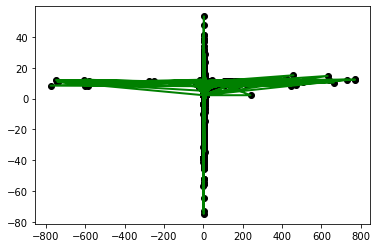

In [16]:
plt.scatter(y_test, y_predict,  color='black')
plt.plot(y_test, y_predict, color='green', linewidth=2)

In [145]:
y_predict.shape

(180224,)

In [30]:
print(max(y_predict))
print(min(y_predict))

41.80352555634103
-6.116513469359459


In [17]:
df_test['predict'] = y_predict

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_1413/2607239917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = y_predict


In [18]:
df_test[['i', 'j', 'k', 'predict']]

,i,j,k,predict
3063808,0,0,0,2.169511
3063809,0,0,1,2.169511
3063810,0,0,2,2.169511
3063811,0,0,3,2.169511
3063812,0,0,4,2.169511
...,...,...,...,...
3244027,43,63,59,2.169511
3244028,43,63,60,2.169511
3244029,43,63,61,2.169511
3244030,43,63,62,2.169511


In [19]:
np.savetxt(save_path+"br_predict.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [22]:
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df[(df['i']==23) & (df['j']==40) & (df['k']==30)]

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
96798,36,1,23,40,30,169.184204,170.837646,124.911705,82.724098,89.660713,22.784897
277022,36,2,23,40,30,79.849541,86.960266,46.452618,10.093032,18.243193,23.253912
457246,36,3,23,40,30,12.162043,21.907124,-16.266296,-50.783772,-37.670265,23.253912
637470,36,4,23,40,30,-43.044163,-31.055937,-66.190498,-97.964561,-84.254242,23.253912
817694,36,5,23,40,30,-87.348495,-75.071793,-108.699982,-138.804398,-123.922249,23.253912
997918,36,6,23,40,30,-125.577248,-112.717628,-145.829269,-173.729950,-156.880936,23.253912
1178142,37,1,23,40,30,490.011322,506.277161,476.330505,449.558258,471.618164,24.339472
1358366,37,2,23,40,30,472.422852,490.392059,460.976715,433.184113,459.534607,24.339472
1538590,37,3,23,40,30,459.824280,478.178650,449.580505,424.871674,448.710785,24.339472
1718814,37,4,23,40,30,448.412231,465.670685,437.986053,413.136200,436.840088,24.339472


## Stochastic Gradient Descent (SGD) Regression 
for 55 attributes

In [15]:
reg = make_pipeline(StandardScaler(),
        SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [16]:
print('Train Accuracy: %.3f' % reg.score(X_train, y_train))
print('Test Accuracy: %.3f' % reg.score(X_test, y_test))

Train Accuracy: 0.049
Test Accuracy: -0.005


# Stochastic Gradient Descent (SGD) Regression

In [17]:
reg = SGDRegressor(max_iter=1000, tol=1e-3)
reg.fit(X_train, y_train)

SGDRegressor()

In [18]:
print('Train Accuracy: %.3f' % reg.score(X_train, y_train))
print('Test Accuracy: %.3f' % reg.score(X_test, y_test))

Train Accuracy: -954183968123602230719807488.000
Test Accuracy: -1088366867262697102928510976.000


# SVM

In [ ]:
regr = SVR()
regr.fit(X_train, y_train)

In [ ]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [ ]:
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))
print(r2_score(y_test, y_predict))


# Kernel Ridge Regression (KRR)

In [ ]:
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)

In [ ]:
print('Train Accuracy: %.3f' % krr.score(X_train, y_train))
print('Test Accuracy: %.3f' % krr.score(X_test, y_test))

# Decision Tree Regressor

In [11]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [12]:
print('Train Accuracy: %.3f' % clf.score(X_train, y_train))
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Train Accuracy: 1.000
Test Accuracy: 0.167


# K Neighbors Regressor

In [22]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
print('Train Accuracy: %.3f' % neigh.score(X_train, y_train))
print('Test Accuracy: %.3f' % neigh.score(X_test, y_test))